### Contents

* Logistic regression
* Boosting (XGBoost)
* ANN (tensorflow/keras)



### Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud 

### Importing packages and data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import tensorflow as tf

In [27]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.0/72.0 MB 8.4 MB/s eta 0:00:09
   - -------------------------------------- 3.1/72.0 MB 10.2 MB/s eta 0:00:07
   -- ------------------------------------- 5.0/72.0 MB 10.1 MB/s eta 0:00:07
   --- ------------------------------------ 6.0/72.0 MB 9.2 MB/s eta 0:00:08
   ---- ----------------------------------- 8.4/72.0 MB 9.1 MB/s eta 0:00:07
   ----- ---------------------------------- 10.5/72.0 MB 9.3 MB/s eta 0:00:07
   ------- -------------------------------- 12.8/72.0 MB 9.7 MB/s eta 0:00:07
   -------- ------------------------------- 14.9/72.0 MB 9.9 MB/s eta 0:00:06
   --------- ------------------------------ 17.6/72.0 MB 10.2 MB/s eta 0:00:06
   ---------- ----------------------------- 19.1/72.0 MB 10.4 MB/s eta 0:00:06
   ----------- ---------------------------- 21.5/72.0 MB 10.1 MB/s eta 0:00:05
   ------------- -------------------------- 23.9/72.0 MB 10.3 MB/s eta 0

In [6]:
!pip install kagglehub

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")


In [7]:
#importing data from kaggle
import os

csv_path = os.path.join(path, "creditcard.csv")
df = pd.read_csv(csv_path)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Data processing and undersampling

In [11]:
df = df.drop("Time", axis=1)

We need to standardize the 'Amount' feature before modelling. 
For that, we use the StandardScaler function from sklearn. Then, we just have to drop the old feature :

In [12]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [13]:
#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df = df.drop("Amount", axis=1)

Now, let's have a look at the class :

<Axes: xlabel='Class', ylabel='count'>

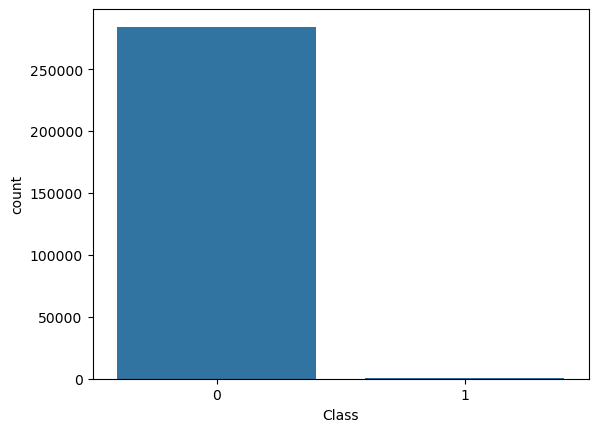

In [14]:
sns.countplot(x="Class", data=df)

The dataset is highly imbalanced 
It's a big problem because classifiers will always predict the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one. To change that, I will proceed to do random undersampling and also SMOTE and then compare their results. 

The simplest undersampling technique involves randomly selecting examples from the majority class and deleting them from the training dataset. This is referred to as random undersampling.

Whereas SMOTE (Synthetic Minority Oversampling Technique) is an oversampling method that increases the number of minority-class samples without simply duplicating them.
Instead, it generates new synthetic samples by interpolating between a sample and its nearest minority-class neighbours.

Limitations of Random Undersampling ->

Random undersampling removes majority-class samples without checking how important they are for defining the decision boundary. Because of this, the model may lose useful information, leading to weaker predictive performance. It may also cause the classifier to underfit since it trains on a much smaller dataset.

Limitations of SMOTE ->

SMOTE creates synthetic minority-class samples by interpolating between existing points, which can sometimes generate unrealistic or noisy examples. If minority samples are scattered or overlapping with majority samples, SMOTE may create ambiguous points that deteriorate model performance. In high dimensional data, the synthetic samples may not represent meaningful patterns, increasing the risk of overfitting.


In [15]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [16]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [17]:
X = df[cols]
Y = df[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [18]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

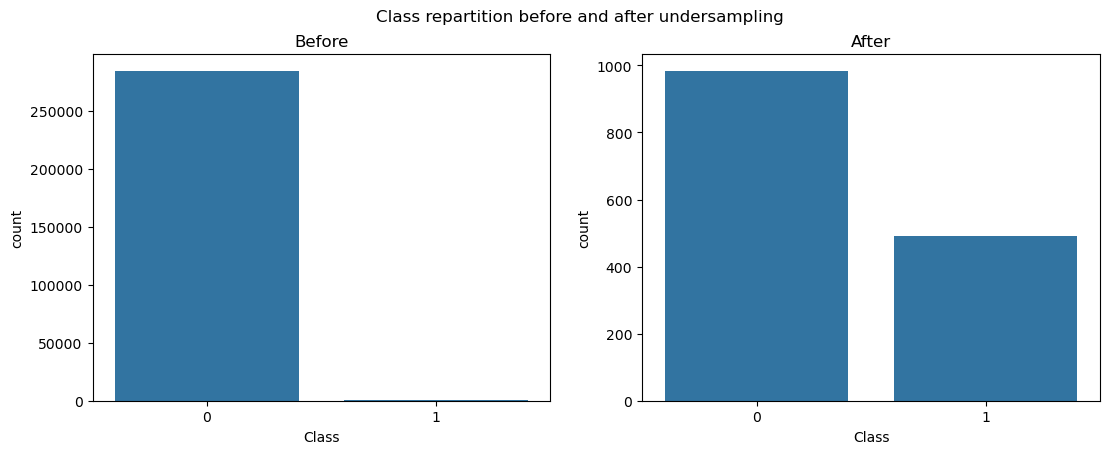

In [19]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=1)

X_smote, Y_smote = smote.fit_resample(X, Y)


In [22]:
df_smote = pd.DataFrame(Y_smote, columns=['Class'])

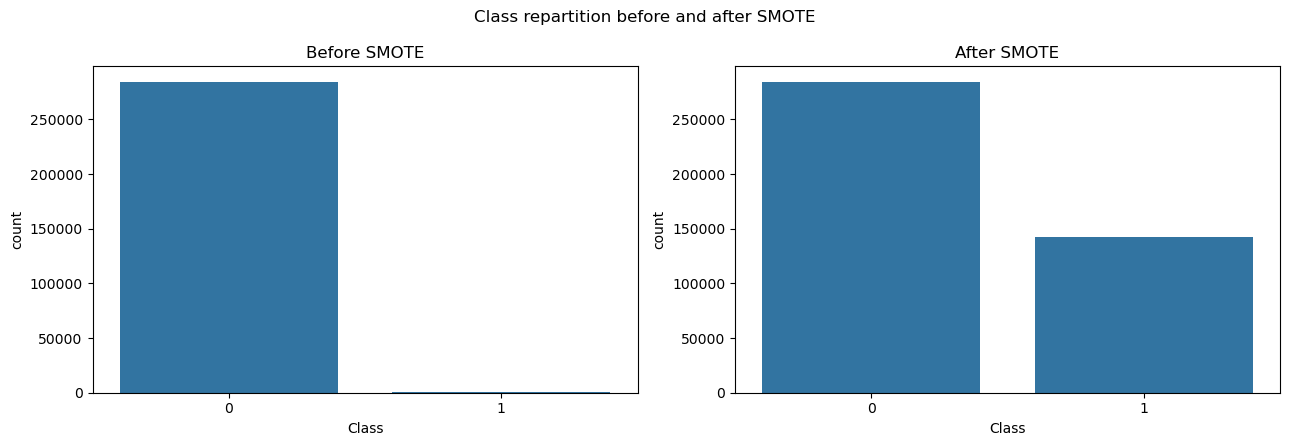

In [23]:
# Visualizing SMOTE results

fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))

sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=df_smote, ax=axs[1])

fig.suptitle("Class repartition before and after SMOTE")
axs[0].set_title("Before SMOTE")
axs[1].set_title("After SMOTE")

plt.tight_layout()
plt.show()


In [24]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_smote, Y_smote, test_size=0.2, random_state=1
)

In [25]:
#importing packages for modeling
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

# 1. Logistic Regression

In [26]:
#train the model
model1 = LogisticRegression(random_state=2)
logit = model1.fit(X_train, y_train)

In [27]:
#predictions
y_pred_logit = model1.predict(X_test) 
y_pred_logit_proba = model1.predict_proba(X_test)[:, 1]

In [28]:
model1_s = LogisticRegression(random_state=2)
model1_s.fit(X_train_s, y_train_s)

LogisticRegression(random_state=2)

In [29]:
y_pred_logit_s = model1_s.predict(X_test_s)
y_pred_logit_proba_s = model1_s.predict_proba(X_test_s)[:, 1]

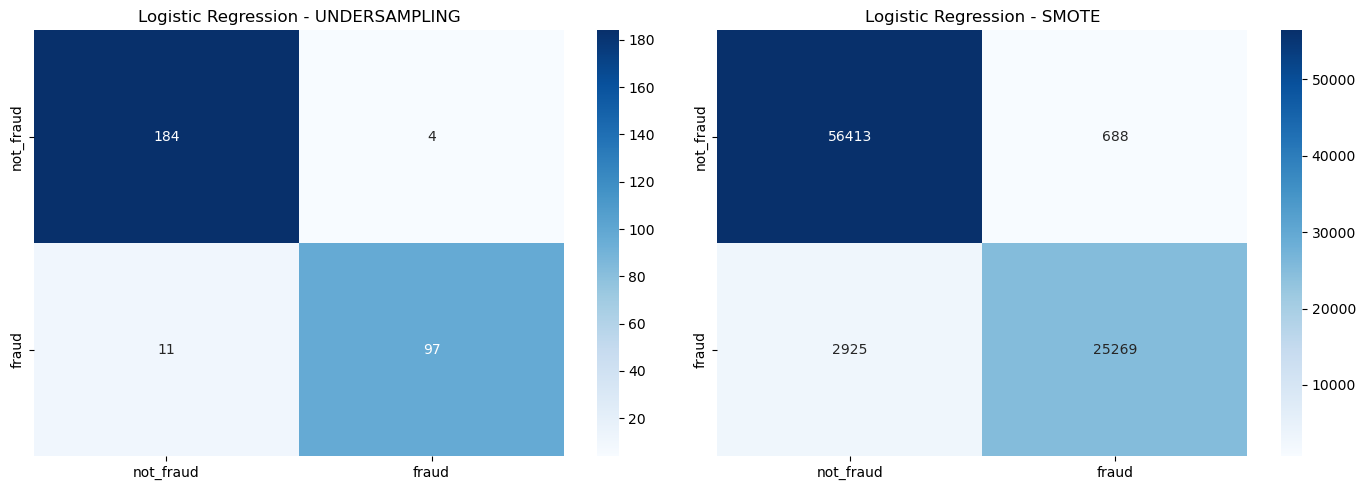

In [30]:

# CONFUSION MATRIX

cm_under = confusion_matrix(y_test, y_pred_logit)
cm_smote = confusion_matrix(y_test_s, y_pred_logit_s)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(pd.DataFrame(cm_under,
                         index=['not_fraud','fraud'],
                         columns=['not_fraud','fraud']),
            annot=True, cmap="Blues", fmt='g', ax=axs[0])
axs[0].set_title("Logistic Regression - UNDERSAMPLING")

sns.heatmap(pd.DataFrame(cm_smote,
                         index=['not_fraud','fraud'],
                         columns=['not_fraud','fraud']),
            annot=True, cmap="Blues", fmt='g', ax=axs[1])
axs[1].set_title("Logistic Regression - SMOTE")

plt.tight_layout()
plt.show()


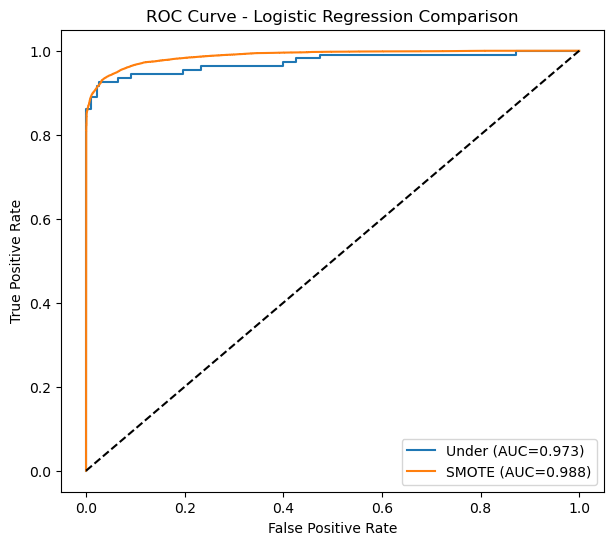

In [31]:

# ROC CURVES

fpr_under, tpr_under, _ = roc_curve(y_test, y_pred_logit_proba)
auc_under = roc_auc_score(y_test, y_pred_logit_proba)

fpr_smote, tpr_smote, _ = roc_curve(y_test_s, y_pred_logit_proba_s)
auc_smote = roc_auc_score(y_test_s, y_pred_logit_proba_s)

plt.figure(figsize=(7, 6))
plt.plot(fpr_under, tpr_under, label=f"Under (AUC={auc_under:.3f})")
plt.plot(fpr_smote, tpr_smote, label=f"SMOTE (AUC={auc_smote:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression Comparison")
plt.legend()
plt.show()

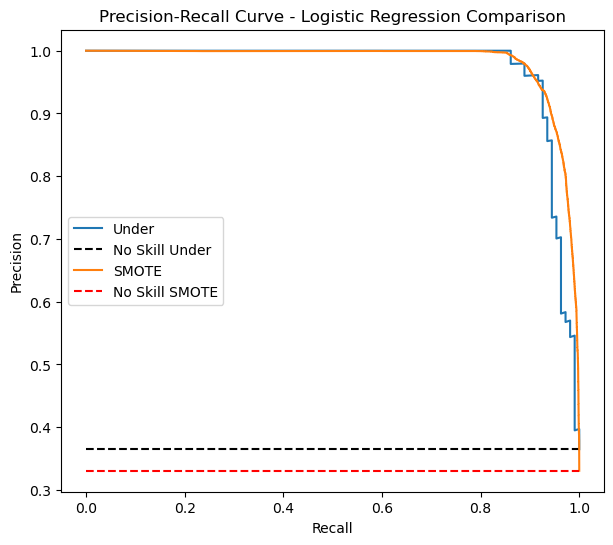

In [32]:

#PRECISION-RECALL

prec_u, rec_u, _ = precision_recall_curve(y_test, y_pred_logit_proba)
prec_s, rec_s, _ = precision_recall_curve(y_test_s, y_pred_logit_proba_s)

no_skill_u = len(y_test[y_test==1]) / len(y_test)
no_skill_s = len(y_test_s[y_test_s==1]) / len(y_test_s)

plt.figure(figsize=(7, 6))

# Under PR
plt.plot(rec_u, prec_u, label="Under")
plt.plot([0,1],[no_skill_u,no_skill_u],'k--', label="No Skill Under")

# SMOTE PR
plt.plot(rec_s, prec_s, label="SMOTE")
plt.plot([0,1],[no_skill_s,no_skill_s],'r--', label="No Skill SMOTE")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression Comparison")
plt.legend()
plt.show()

In [33]:

# METRIC SUMMARY

print("Logistic Regression Comparison ")
print("Undersampling:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_logit))
print("Precision:", metrics.precision_score(y_test, y_pred_logit))
print("Recall:", metrics.recall_score(y_test, y_pred_logit))
print("F1 Score:", metrics.f1_score(y_test, y_pred_logit))
print("AUC:", auc_under)

print("\nSMOTE:")
print("Accuracy:", metrics.accuracy_score(y_test_s, y_pred_logit_s))
print("Precision:", metrics.precision_score(y_test_s, y_pred_logit_s))
print("Recall:", metrics.recall_score(y_test_s, y_pred_logit_s))
print("F1 Score:", metrics.f1_score(y_test_s, y_pred_logit_s))
print("AUC:", auc_smote)

Logistic Regression Comparison 
Undersampling:
Accuracy: 0.9493243243243243
Precision: 0.9603960396039604
Recall: 0.8981481481481481
F1 Score: 0.9282296650717703
AUC: 0.9733550039401102

SMOTE:
Accuracy: 0.9576411278504016
Precision: 0.9734946257271642
Recall: 0.8962545222387742
F1 Score: 0.9332791638196893
AUC: 0.9882049397363608


Classification metrics for Logistic Regression (rounded down) :
1) Undersampling :
    - Accuracy : 0.94
    - F1 score : 0.92
    - AUC : 0.97
2) SMOTE :
    - Accuracy : 0.95
    - F1 score : 0.93
    - AUC : 0.988
 

# 2. Ensemble learning : Boosting (XGBoost)

In [34]:
#train the model on undersampled data
model2 = XGBClassifier(random_state=2)
xgb = model2.fit(X_train, y_train)

In [35]:
#predictions
y_pred_xgb = model2.predict(X_test) 
y_pred_xgb_proba = model2.predict_proba(X_test)[:, 1]

In [36]:
# Train model on SMOTE data
model2_s = XGBClassifier(random_state=2)
model2_s.fit(X_train_s, y_train_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [37]:
# Predictions
y_pred_xgb_s = model2_s.predict(X_test_s)
y_pred_xgb_proba_s = model2_s.predict_proba(X_test_s)[:, 1]

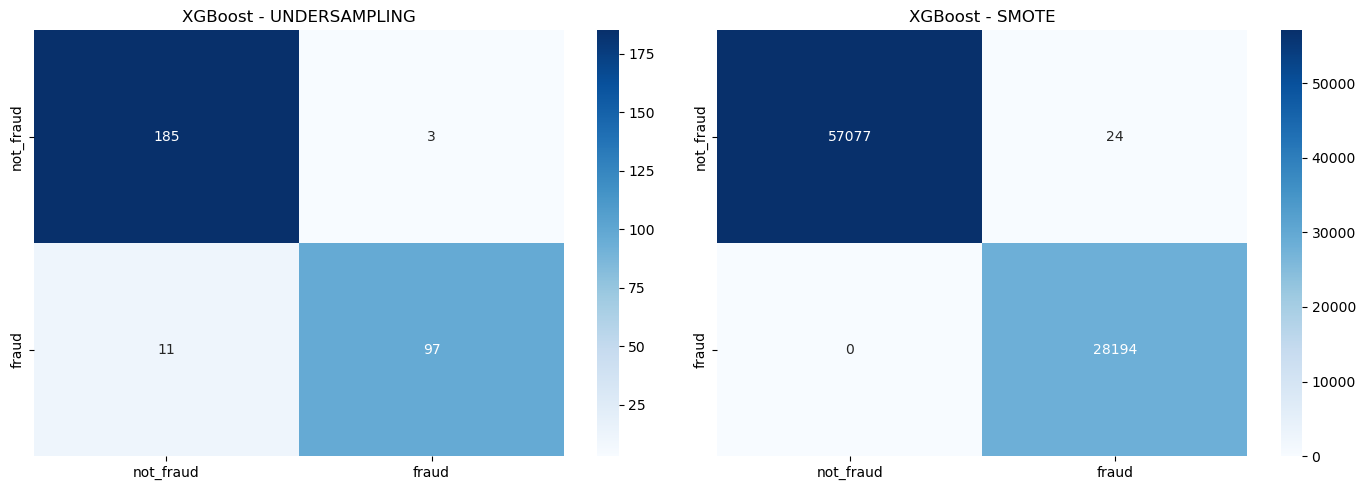

In [38]:

# CONFUSION MATRIX

cm_under = confusion_matrix(y_test, y_pred_xgb)
cm_smote = confusion_matrix(y_test_s, y_pred_xgb_s)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(pd.DataFrame(cm_under,
                         index=['not_fraud','fraud'],
                         columns=['not_fraud','fraud']),
            annot=True, cmap="Blues", fmt='g', ax=axs[0])
axs[0].set_title("XGBoost - UNDERSAMPLING")

sns.heatmap(pd.DataFrame(cm_smote,
                         index=['not_fraud','fraud'],
                         columns=['not_fraud','fraud']),
            annot=True, cmap="Blues", fmt='g', ax=axs[1])
axs[1].set_title("XGBoost - SMOTE")

plt.tight_layout()
plt.show()

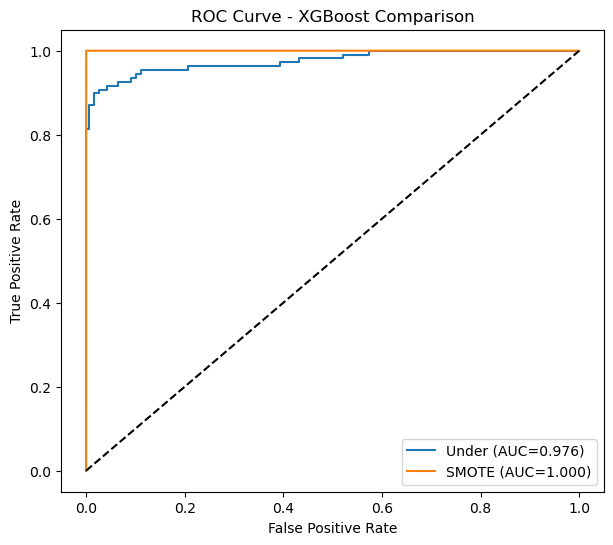

In [39]:

# ROC CURVES

fpr_under, tpr_under, _ = roc_curve(y_test, y_pred_xgb_proba)
auc_under = roc_auc_score(y_test, y_pred_xgb_proba)

fpr_smote, tpr_smote, _ = roc_curve(y_test_s, y_pred_xgb_proba_s)
auc_smote = roc_auc_score(y_test_s, y_pred_xgb_proba_s)

plt.figure(figsize=(7, 6))
plt.plot(fpr_under, tpr_under, label=f"Under (AUC={auc_under:.3f})")
plt.plot(fpr_smote, tpr_smote, label=f"SMOTE (AUC={auc_smote:.3f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost Comparison")
plt.legend()
plt.show()

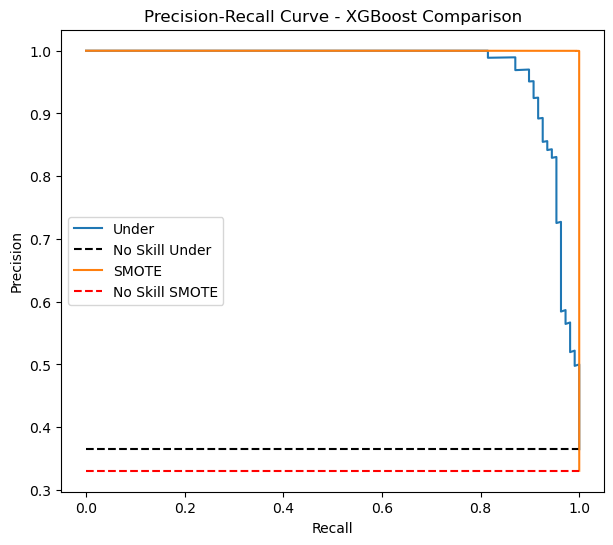

In [40]:

# PRECISION-RECALL CURVES

prec_u, rec_u, _ = precision_recall_curve(y_test, y_pred_xgb_proba)
prec_s, rec_s, _ = precision_recall_curve(y_test_s, y_pred_xgb_proba_s)

no_skill_u = len(y_test[y_test==1]) / len(y_test)
no_skill_s = len(y_test_s[y_test_s==1]) / len(y_test_s)

plt.figure(figsize=(7, 6))

# Under PR
plt.plot(rec_u, prec_u, label="Under")
plt.plot([0,1],[no_skill_u,no_skill_u],'k--', label="No Skill Under")

# SMOTE PR
plt.plot(rec_s, prec_s, label="SMOTE")
plt.plot([0,1],[no_skill_s,no_skill_s],'r--', label="No Skill SMOTE")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost Comparison")
plt.legend()
plt.show()

In [41]:

# METRIC SUMMARY

print("XGBoost Comparison ")
print("Undersampling:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score:", metrics.f1_score(y_test, y_pred_xgb))
print("AUC:", auc_under)

print("\nSMOTE:")
print("Accuracy:", metrics.accuracy_score(y_test_s, y_pred_xgb_s))
print("Precision:", metrics.precision_score(y_test_s, y_pred_xgb_s))
print("Recall:", metrics.recall_score(y_test_s, y_pred_xgb_s))
print("F1 Score:", metrics.f1_score(y_test_s, y_pred_xgb_s))
print("AUC:", auc_smote)

XGBoost Comparison 
Undersampling:
Accuracy: 0.9527027027027027
Precision: 0.97
Recall: 0.8981481481481481
F1 Score: 0.9326923076923077
AUC: 0.9755220646178093

SMOTE:
Accuracy: 0.9997186236004455
Precision: 0.9991494790559218
Recall: 1.0
F1 Score: 0.9995745586045522
AUC: 0.9999893024783166


Classification metrics for Logistic Regression (rounded down) :
1) Undersampling :
    - Accuracy : 0.95
    - F1 score : 0.93
    - AUC : 0.975
2) SMOTE :
    - Accuracy : 0.99
    - F1 score : 0.99
    - AUC : 0.99

# 3. Artificial Neural Network with Tensorflow(Keras)

In [59]:
#ANN for undersampled one
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.1),

    Dense(16),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.1),

    Dense(8),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.1),

    Dense(4),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.1),

    Dense(1, activation='sigmoid')
])


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #optimizer

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) #metrics

In [61]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=True)

In [62]:
history = model.fit(X_train.values, y_train.values, epochs = 20, batch_size=32, validation_split = 0.15, verbose = 0,
                    callbacks = [earlystopper])
history_dict = history.history

Restoring model weights from the end of the best epoch: 19.


In [46]:

# ANN (SMOTE Version) nd Improved Architecture

model_s = Sequential([
    Dense(64, input_shape=(X_train_s.shape[1],)),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.3),

    Dense(32),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.3),

    Dense(16),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.2),

    Dense(8),
    BatchNormalization(),
    tf.keras.layers.ReLU(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_s.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
earlystopper_s = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    verbose=1,
    restore_best_weights=True
)


In [49]:
history_s = model_s.fit(
    X_train_s, y_train_s,
    epochs=25,
    batch_size=64,
    validation_split=0.15,
    verbose=0,
    callbacks=[earlystopper_s]
)

Restoring model weights from the end of the best epoch: 19.


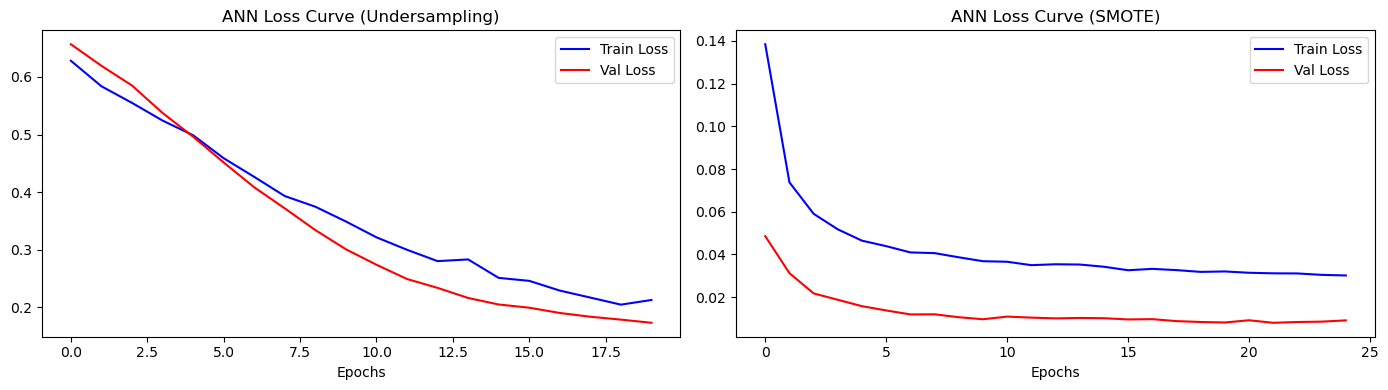

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

# Undersampling Loss 
axs[0].plot(history.history['loss'], 'b', label='Train Loss')
axs[0].plot(history.history['val_loss'], 'r', label='Val Loss')
axs[0].set_title("ANN Loss Curve (Undersampling)")
axs[0].set_xlabel("Epochs")
axs[0].legend()

# SMOTE Loss 
axs[1].plot(history_s.history['loss'], 'b', label='Train Loss')
axs[1].plot(history_s.history['val_loss'], 'r', label='Val Loss')
axs[1].set_title("ANN Loss Curve (SMOTE)")
axs[1].set_xlabel("Epochs")
axs[1].legend()

plt.tight_layout()
plt.show()

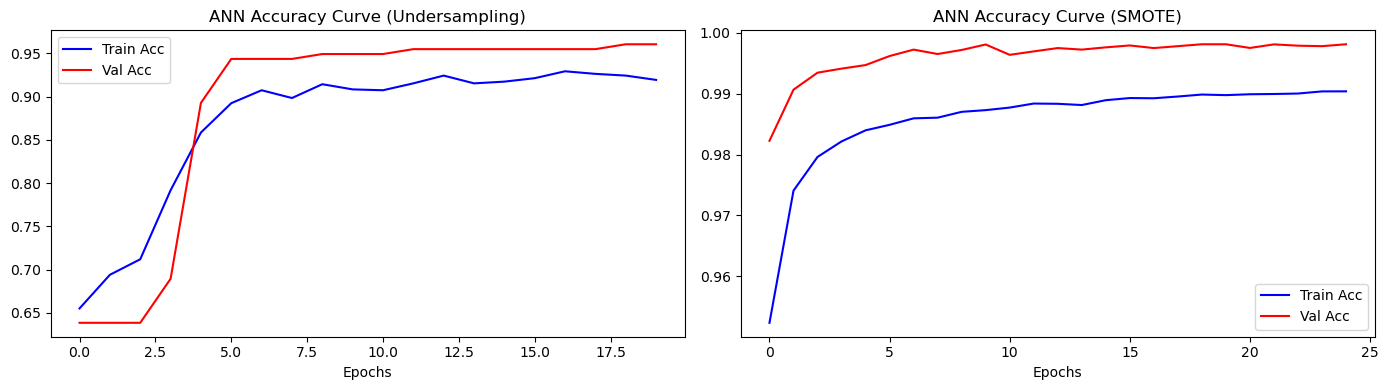

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

# Undersampling Accuracy 
axs[0].plot(history.history['accuracy'], 'b', label='Train Acc')
axs[0].plot(history.history['val_accuracy'], 'r', label='Val Acc')
axs[0].set_title("ANN Accuracy Curve (Undersampling)")
axs[0].set_xlabel("Epochs")
axs[0].legend()

# SMOTE Accuracy 
axs[1].plot(history_s.history['accuracy'], 'b', label='Train Acc')
axs[1].plot(history_s.history['val_accuracy'], 'r', label='Val Acc')
axs[1].set_title("ANN Accuracy Curve (SMOTE)")
axs[1].set_xlabel("Epochs")
axs[1].legend()

plt.tight_layout()
plt.show()

In [65]:
#predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
y_pred_nn_proba = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [66]:
y_pred_nn_s = (model_s.predict(X_test_s) > 0.5).astype(int)
y_pred_nn_proba_s = model_s.predict(X_test_s)

2666/2666 ━━━━━━━━━━━━━━━━━━━━ 2s 838us/step
2666/2666 ━━━━━━━━━━━━━━━━━━━━ 2s 851us/step


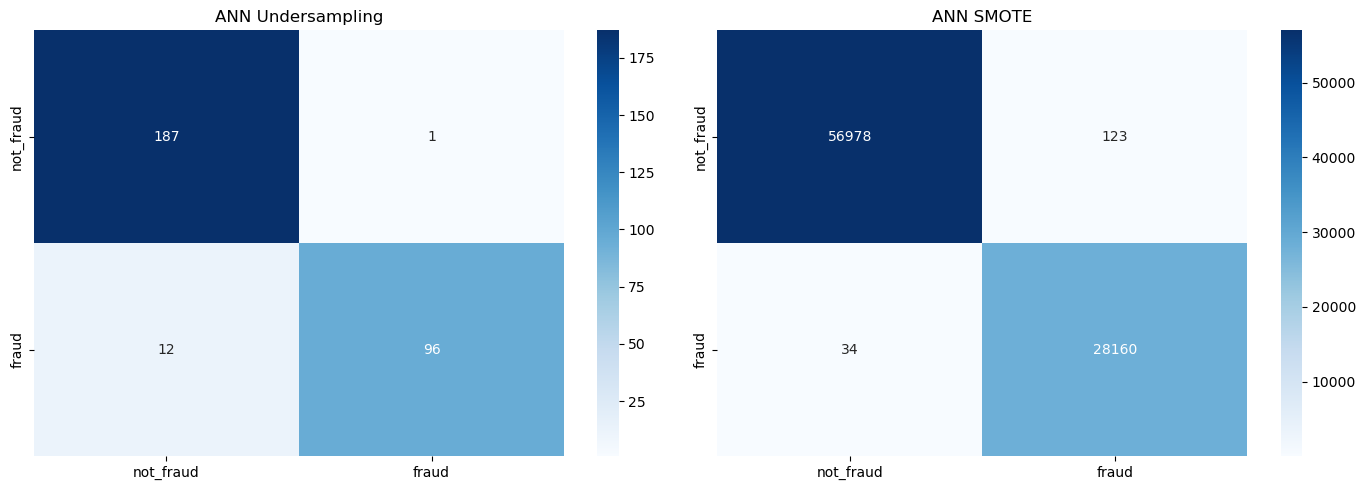

In [67]:

# Confusion Matrix Comparison

cm_under = confusion_matrix(y_test, y_pred_nn)         # from undersampling ANN
cm_smote = confusion_matrix(y_test_s, y_pred_nn_s)     # from SMOTE ANN

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(pd.DataFrame(cm_under,
                         index=['not_fraud','fraud'],
                         columns=['not_fraud','fraud']),
            annot=True, cmap="Blues", fmt='g', ax=axs[0])
axs[0].set_title("ANN Undersampling")

sns.heatmap(pd.DataFrame(cm_smote,
                         index=['not_fraud','fraud'],
                         columns=['not_fraud','fraud']),
            annot=True, cmap="Blues", fmt='g', ax=axs[1])
axs[1].set_title("ANN SMOTE")

plt.tight_layout()
plt.show()

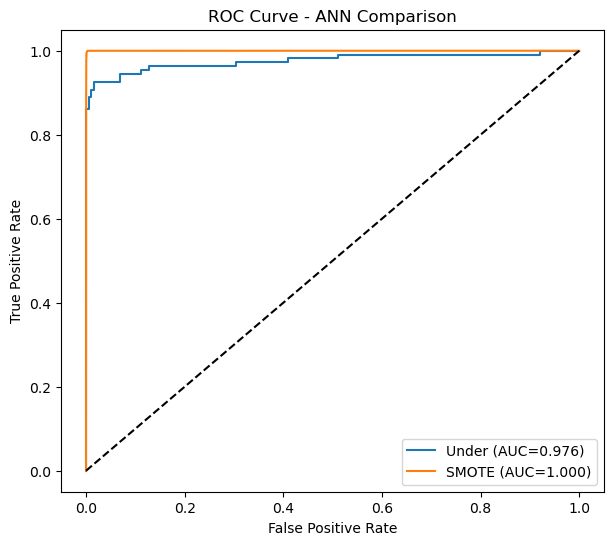

In [68]:

# ROC Comparison

fpr_under, tpr_under, _ = roc_curve(y_test, y_pred_nn_proba)
auc_under = auc(fpr_under, tpr_under)

fpr_sm, tpr_sm, _ = roc_curve(y_test_s, y_pred_nn_proba_s)
auc_sm = auc(fpr_sm, tpr_sm)

plt.figure(figsize=(7, 6))
plt.plot(fpr_under, tpr_under, label=f"Under (AUC={auc_under:.3f})")
plt.plot(fpr_sm, tpr_sm, label=f"SMOTE (AUC={auc_sm:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve - ANN Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

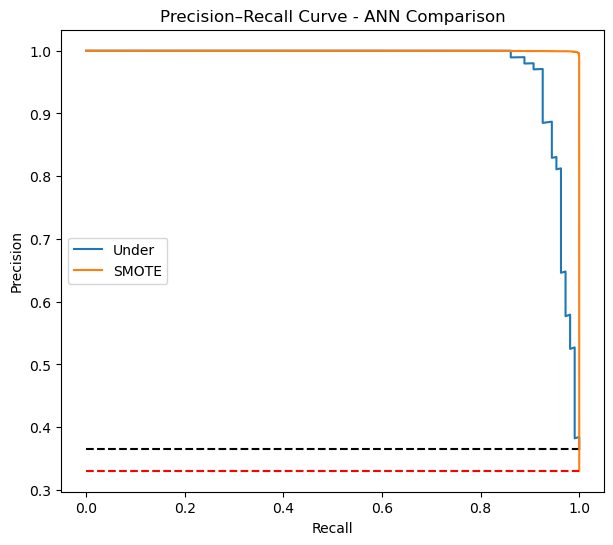

In [69]:
# Precision-Recall Curves

prec_u, rec_u, _ = precision_recall_curve(y_test, y_pred_nn_proba)
prec_s, rec_s, _ = precision_recall_curve(y_test_s, y_pred_nn_proba_s)

no_skill_u = len(y_test[y_test==1]) / len(y_test)
no_skill_s = len(y_test_s[y_test_s==1]) / len(y_test_s)

plt.figure(figsize=(7, 6))
plt.plot(rec_u, prec_u, label="Under")
plt.plot([0,1],[no_skill_u,no_skill_u],'k--')

plt.plot(rec_s, prec_s, label="SMOTE")
plt.plot([0,1],[no_skill_s,no_skill_s],'r--')

plt.title("Precision–Recall Curve - ANN Comparison")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [70]:
#METRIC SUMMARY

print("ANN Comparison -> ")
print("Undersampling:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_nn))
print("Precision:", metrics.precision_score(y_test, y_pred_nn))
print("Recall:", metrics.recall_score(y_test, y_pred_nn))
print("F1:", metrics.f1_score(y_test, y_pred_nn))
print()

print("SMOTE:")
print("Accuracy:", metrics.accuracy_score(y_test_s, y_pred_nn_s))
print("Precision:", metrics.precision_score(y_test_s, y_pred_nn_s))
print("Recall:", metrics.recall_score(y_test_s, y_pred_nn_s))
print("F1:", metrics.f1_score(y_test_s, y_pred_nn_s))
print()
print("AUC Under:", auc_under)
print("AUC SMOTE:", auc_sm)

ANN Comparison -> 
Undersampling:
Accuracy: 0.956081081081081
Precision: 0.9896907216494846
Recall: 0.8888888888888888
F1: 0.9365853658536586

SMOTE:
Accuracy: 0.9981593293862477
Precision: 0.9956510978326203
Recall: 0.9987940696602114
F1: 0.997220107300317

AUC Under: 0.9760145784081953
AUC SMOTE: 0.9999233669350179


Classification metrics for Logistic Regression (rounded down) :
1) Undersampling :
    - Accuracy : 0.95
    - F1 score : 0.93
    - AUC : 0.97
2) SMOTE :
    - Accuracy : 0.99
    - F1 score : 0.99
    - AUC : 0.99